In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq

from src.radar import Radar

In [2]:
radar = Radar("scripts/1443_mmwavestudio_config.lua")

c = 3e8                                                 # speed of light - m/s
SAMPLES_PER_CHIRP = radar.params['n_samples']           # adc number of samples per chirp
SAMPLE_RATE = radar.params['sample_rate']               # digout sample rate in Hz
FREQ_SLOPE = radar.params['chirp_slope']                # frequency slope in Hz (/s)

[INFO] Starting radar node with config: scripts/1443_mmwavestudio_config.lua
[INFO] Radar connected. Params:
platform                 : xWR14xx
adc_output_fmt           : 1
n_chirps                 : 32
rx                       : 1, 1, 1, 1
n_rx                     : 4
tx                       : 1, 1, 1
n_tx                     : 3
n_samples                : 512
frame_size               : 262144 bytes
frame_time               : 100 ms
chirp_time               : 162 µs
chirp_slope              : 60012000000000.0000 Hz/s
sample_rate              : 10000000.0000 samples/s
chirp_sampling_rate      : 320.0000 Hz
velocity_max             : 6.0125 m/s
velocity_res             : 0.1879 m/s
range_max                : 24.9950 m
range_res                : 0.0488 m
t_sweep                  : 0.0001 s


In [11]:
frame = radar.read()
frame.shape # shape (num_chirps, num_samples, num_rx)

Packet drop
Packet drop


(32, 512, 4)

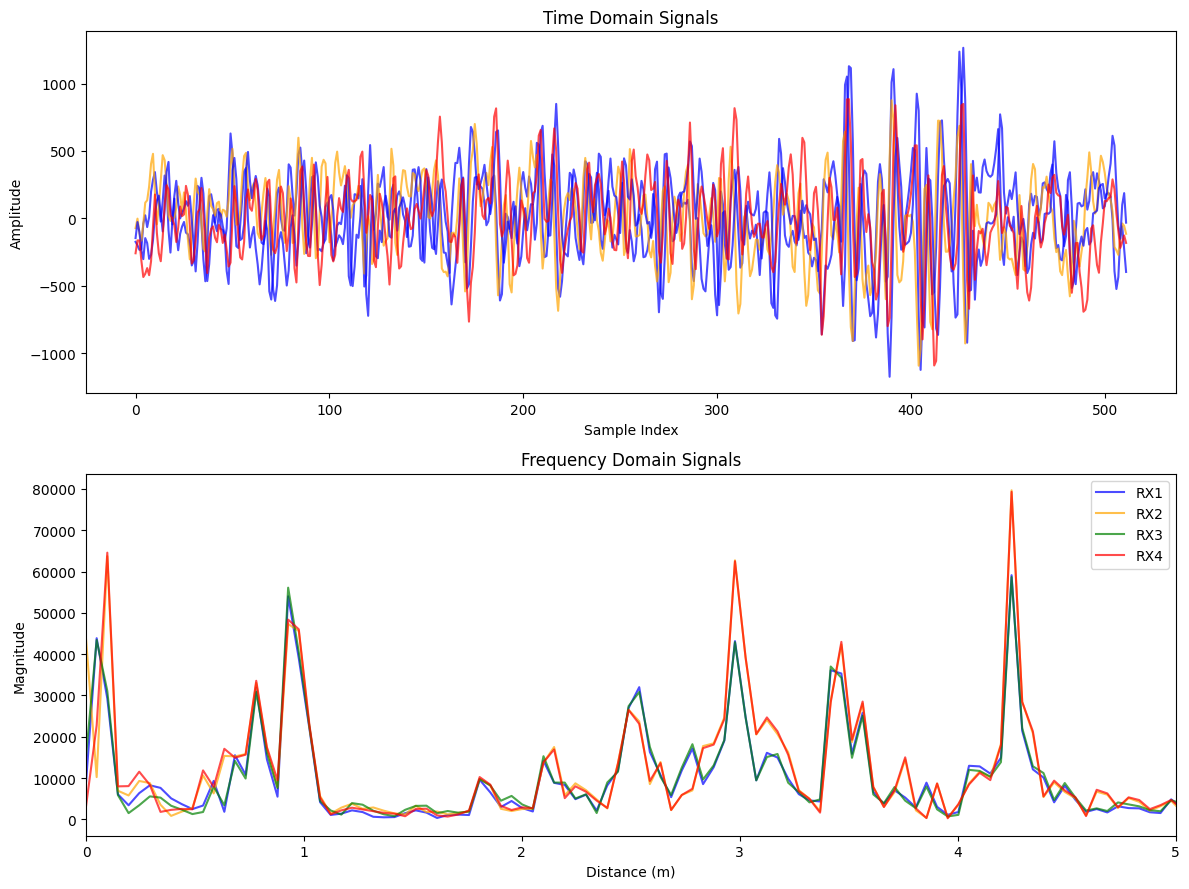

In [12]:
# signal = frame[0, :, :] # take the first chirp and first rx channel
signal = np.mean(frame, axis=0)
fft_result = fft(signal, axis=0)
fft_freqs = fftfreq(SAMPLES_PER_CHIRP, 1/SAMPLE_RATE)
fft_meters = fft_freqs * c / (2 * FREQ_SLOPE)

plt.figure(figsize=(12, 9))
# --- Time Domain Plot ---
plt.subplot(2, 1, 1)
plt.plot(signal[:, 0], color='blue', label='RX1', alpha=0.7)
plt.plot(signal[:, 1], color='orange', label='RX2', alpha=0.7)
plt.plot(signal[:, 2], color='blue', label='RX3', alpha=0.7)
plt.plot(signal[:, 3], color='red', label='RX4', alpha=0.7)
plt.title('Time Domain Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# --- Frequency Domain Plot ---
plt.subplot(2, 1, 2)
plt.plot(fft_meters[:SAMPLES_PER_CHIRP // 2],  np.abs(fft_result[:SAMPLES_PER_CHIRP // 2, 0]), color='blue', label='RX1', alpha=0.7)
plt.plot(fft_meters[:SAMPLES_PER_CHIRP // 2],  np.abs(fft_result[:SAMPLES_PER_CHIRP // 2, 1]), color='orange', label='RX2', alpha=0.7)
plt.plot(fft_meters[:SAMPLES_PER_CHIRP // 2],  np.abs(fft_result[:SAMPLES_PER_CHIRP // 2, 2]), color='green', label='RX3', alpha=0.7)
plt.plot(fft_meters[:SAMPLES_PER_CHIRP // 2],  np.abs(fft_result[:SAMPLES_PER_CHIRP // 2, 3]), color='red', label='RX4', alpha=0.7)
plt.title('Frequency Domain Signals')
plt.xlabel('Distance (m)')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(0,5)
plt.tight_layout()